In [4]:
from sklearn import datasets

#load dataset
iris =datasets.load_iris()
features = iris.data
target = iris.target

#Generate Pandas dataframe
df = pd.DataFrame(features)
df.columns = iris.feature_names


In [6]:
print(target) 
iris.target_names

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
# Print dataset information
print (df.shape)
print (df.head(20))

(150, 4)
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
5                 5.4               3.9                1.7               0.4
6                 4.6               3.4                1.4               0.3
7                 5.0               3.4                1.5               0.2
8                 4.4               2.9                1.4               0.2
9                 4.9               3.1                1.5               0.1
10                5.4               3.7                1.5               0.2
11                4.8               3.4                1.6         

In [9]:
# Print dataset descriptions and class distribution
print(df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.198667  
std            0.763161  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


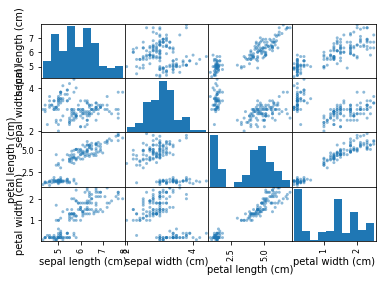

In [14]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

#display scatter plot matrix
scatter_matrix(df)
plt.show()

In [11]:
# The elbow method to determine optimal number of clusters
from sklearn.cluster import KMeans

#empty x and y data lists
X = []
Y = []

for i in range(1,31):
    #intialize and fit the kmeans model
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    
    #append number of clusters to a data list
    X.append(i)
    
    #append average within cluster sum of squares to y data list
    awcss = kmeans.inertia_/df.shape[0]
    Y.append(awcss)
    



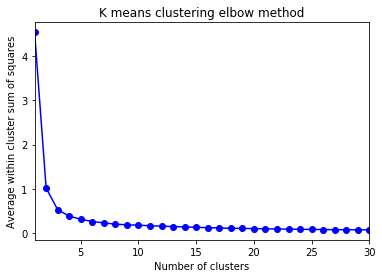

In [13]:
# Visualisation
import matplotlib.pyplot as plt

#Plot x and y data
plt.plot(X,Y,'bo-')
plt.xlim(1,30)
plt.xlabel('Number of clusters')
plt.ylabel('Average within cluster sum of squares')
plt.title('K means clustering elbow method')

plt.show()


3 clusters will be optimal number of clusters as beyond that the Average within cluster sum of squares doesnt decrease significantly


Principal Component Analysis

In [17]:
# Importing required classes
from sklearn.decomposition import PCA
from sklearn import preprocessing


In [21]:
# Performing PCA and reducing number of dimensions to 2
pca = PCA(n_components = 2)
pc = pca.fit_transform(df)

# Print new dimensions

print(pc.shape)
print(pc[:10])


(150, 2)
[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]
 [-2.27989736  0.74778271]
 [-2.82089068 -0.08210451]
 [-2.62648199  0.17040535]
 [-2.88795857 -0.57079803]
 [-2.67384469 -0.1066917 ]]


In [20]:
# Re-fit k mean model to the principal components with the appropriate number of clusters

kmeans = KMeans(n_clusters = 3)
kmeans.fit(pc)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylavel'

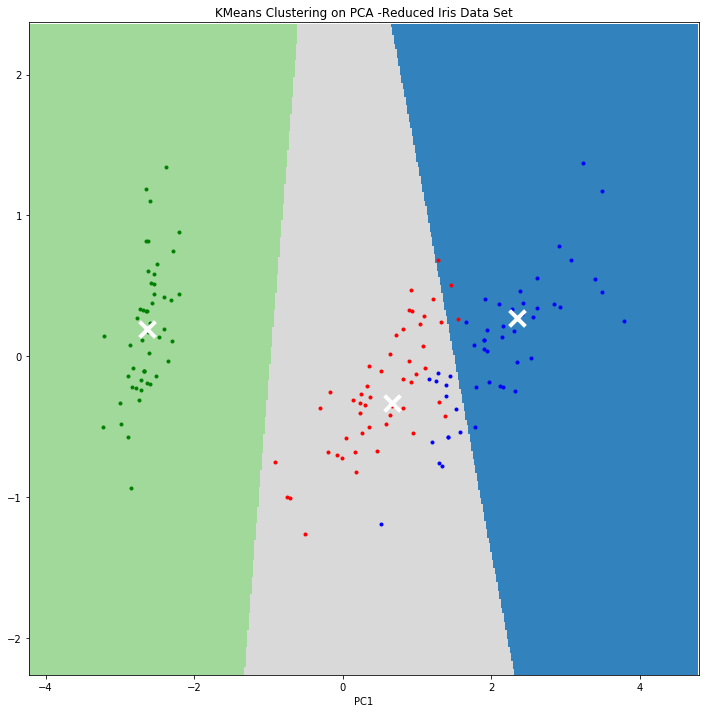

In [22]:
# Visualizing high dimensional clusters using principal components

# set size for mesh
h = 0.02

# generate the mesh grid
x_min, x_max = pc[:,0].min() -1,pc[:,0].max() + 1

y_min ,y_max = pc[:,1].min() -1,pc[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

# Label each point in mesh using last trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

# Generate color plot from results
Z = Z.reshape(xx.shape)
plt.figure(figsize = (12,12))
plt.imshow(Z,interpolation='nearest',extent = (xx.min(),xx.max(),yy.min(),yy.max()),cmap=plt.cm.tab20c,aspect='auto',origin ='lower')

# Plot principle components on the color plot
for i,point in enumerate(pc):
    if target[i]==0: 
        plt.plot(point[0],point[1],'g.')
    if target[i]==1: 
        plt.plot(point[0],point[1],'r.')
    if target[i]==2: 
        plt.plot(point[0],point[1],'b.')

# Plot cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker ='x',s=250,linewidth=4,color='w',zorder = 10)

# Set plot title and axis limits
plt.title('KMeans Clustering on PCA -Reduced Iris Data Set')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xlabel('PC1')
plt.ylavel('PC2')
plt.xticks(())
plt.yticks(())

plt.show()


In [25]:
from sklearn import metrics

# K means clustering on non reduced data
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(features)

# K means clustering on pca reduced data
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(pc)

# print metrics for non reduced data
print('Non-reduced data')
print('Homogeneity :{}'.format(metrics.homogeneity_score(target,kmeans1.labels_)))
print('Completeness :{}'.format(metrics.completeness_score(target,kmeans1.labels_)))
print('VMeasure :{}'.format(metrics.v_measure_score(target,kmeans1.labels_)))

# print metrics for pca reduced data
print('pca reduced data')
print('Homogeneity :{}'.format(metrics.homogeneity_score(target,kmeans2.labels_)))
print('Completeness :{}'.format(metrics.completeness_score(target,kmeans2.labels_)))
print('VMeasure :{}'.format(metrics.v_measure_score(target,kmeans2.labels_)))



Non-reduced data
Homogeneity :0.7514854021988339
Completeness :0.7649861514489816
VMeasure :0.7581756800057786
pca reduced data
Homogeneity :0.736419288125285
Completeness :0.7474865805095325
VMeasure :0.7419116631817838
